# Data Science Project Final Report

## Introduction

A research group in Computer Science UBC collected a data of people playing Minecraft, which records player's action as they navigate through the Minecraft server. 

In this project I would like to address the question whether the age of a person and the played hours can predict the person's experience. I will use knn classification to predict the experience of a person. I think this method will be appropriate as the value that we're predicting is a categorical value, so the knn spec model will be used. A potential weakness of this method would be that since the answer is predicted by the closest neightbours to it, theres a possibility of inaccuracy in the prediction. I will split the data 75% and 25% for the training and testing tests respectively. Splitting the data will be done after exploring the data. I will use 5fold cross validation on the training data.

In the player.csv dataset, there are 196 observations of players with their personal details such as name, age etc, with 7 columns(variables) including gaming details such as experience level, hashed email etc. 
The columns are as follows.

- Variables and Types
  1) experience = factor -> Player's level of experience, categorized as "Pro", "Veteran", "Amateur", "Regular" and "Beginner"
  2) subscribe = logical -> Indicates whether the player is subscribed (TRUE) or not (FALSE) to game-related newsletter
  3) hashedEmail = character -> A hashed representation of the player's email
  4) played_hours = double -> The number of hours the player has played
  5) name = character -> Player's name
  6) gender = factor -> Player's gender
  7) Age = integer -> Player's age in years
- Issues and Potential Issues in Dataset
  1) The age column has missing values.
  2) The hashed email values are not directly available for use as it is hashed.



## Methods and Results

In [3]:
library(repr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [7]:
player_data = read_csv("https://raw.githubusercontent.com/silunij/dsci_individual/refs/heads/main/players.csv")
head(player_data)
tail(player_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,TRUE,644fe4200c19a73768b3fa598afcbd0948f7557925b7f17166285da23af31cc6,0.0,Rhys,Male,20
Amateur,TRUE,b6e9e593b9ec51c5e335457341c324c34a2239531e1890b93ca52ac1dc76b08f,0.0,Bailey,Female,17
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [20]:
mean_values <- player_data |>
    select(played_hours, Age)|>
    summarize(mean_hours = mean(played_hours), mean_age = mean(Age, na.rm = TRUE))
  mean_values  

mean_hours,mean_age
<dbl>,<dbl>
5.845918,20.52062


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


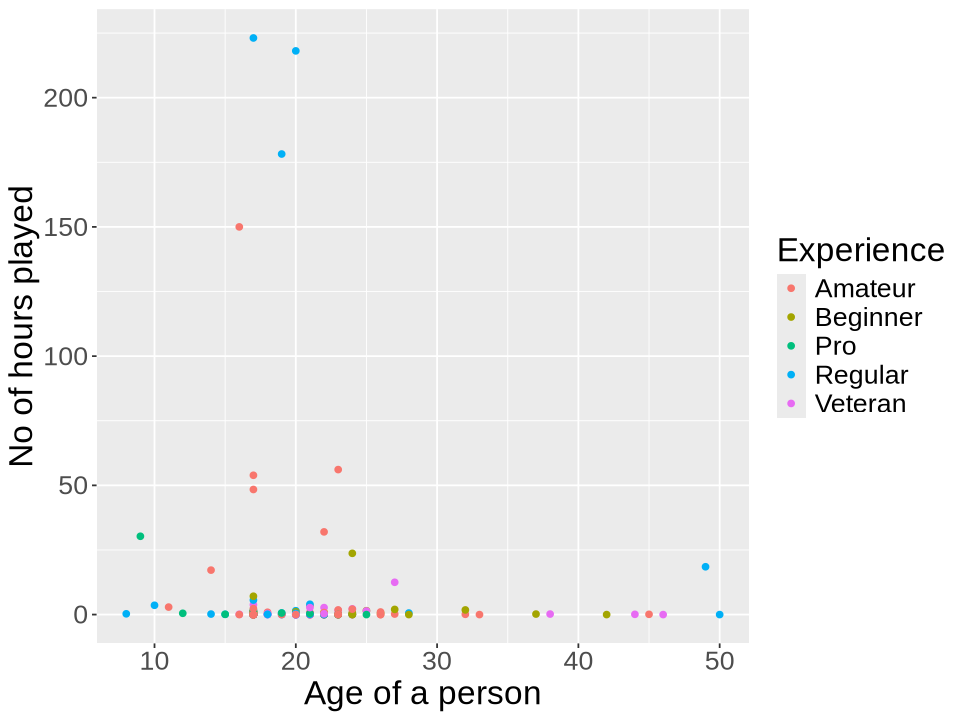

In [30]:
options(repr.plot.width = 8, repr.plot.height = 6)
player_plot_1 <- player_data |>
        ggplot(aes(x = Age , y = played_hours, color = experience)) + 
        geom_point() +
        xlab("Age of a person")+
        ylab("No of hours played")+
        labs(colour = "Experience" )+
        theme(text = element_text(size=20)) # No Answer - remove if you provide an answer
player_plot_1

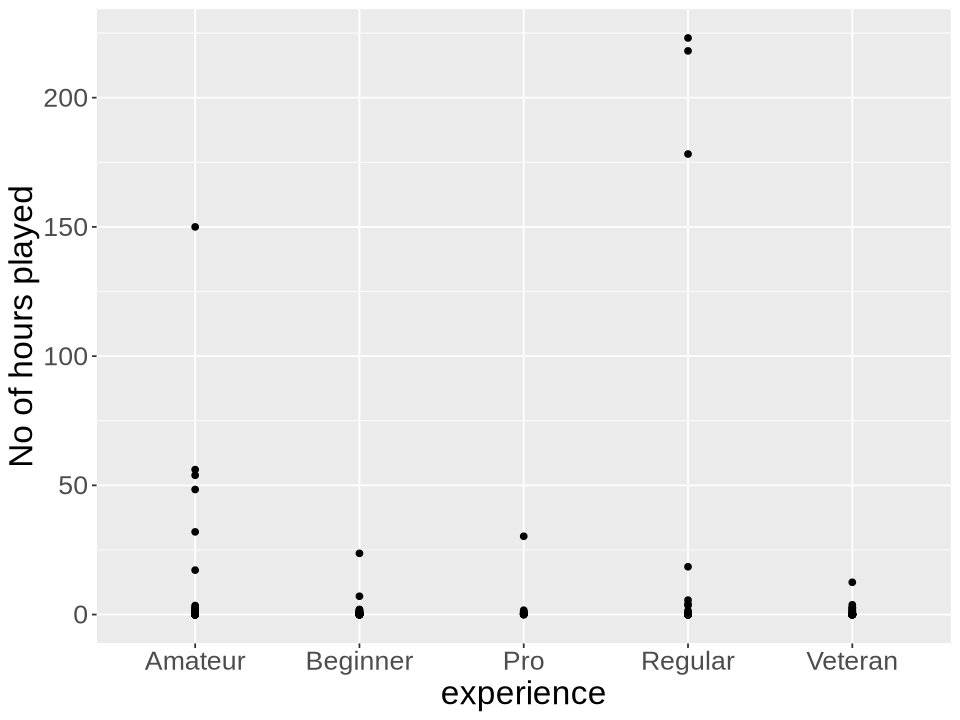

In [34]:
player_plot_3 <- player_data |>
        ggplot(aes(x = experience , y = played_hours)) + 
        geom_point() +
        xlab("experience")+
        ylab("No of hours played")+
        theme(text = element_text(size=20)) # No Answer - remove if you provide an answer
player_plot_3

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


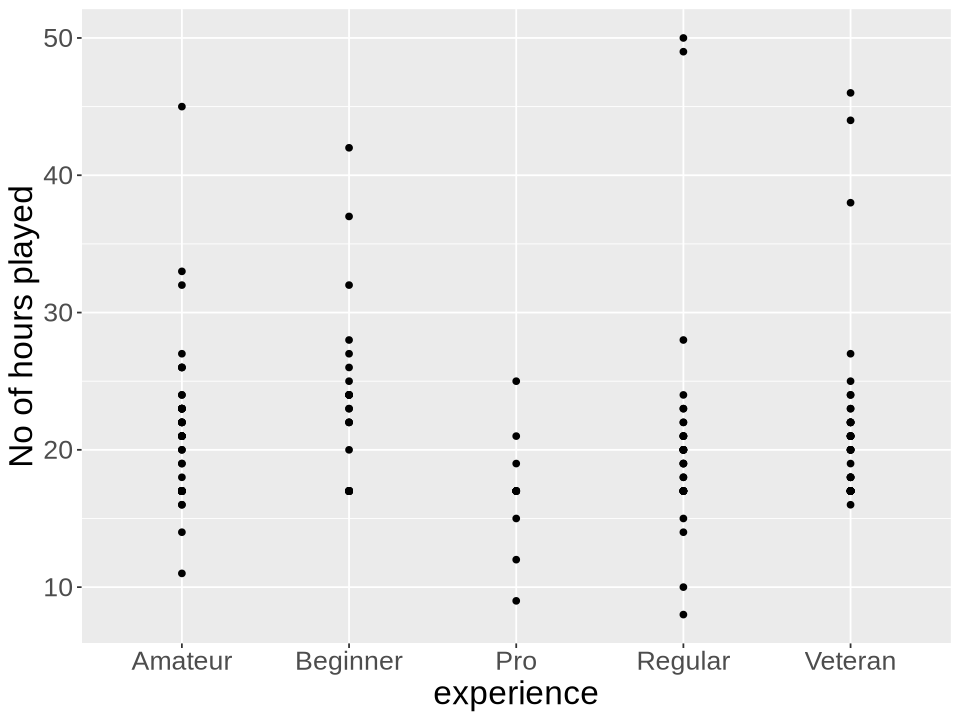

In [33]:
player_plot_4 <- player_data |>
        ggplot(aes(x = experience , y = Age)) + 
        geom_point() +
        xlab("experience")+
        ylab("No of hours played")+
        theme(text = element_text(size=20)) # No Answer - remove if you provide an answer
player_plot_4

the player_plot_1 shows the graph of age against hours_played and the points are colored according to the experience which is the variable I'm trying to predict here. To make the visualization clearer, I plotted the same graph as a line chart in player_plot_2. It shows what aged people with what experience have the highest experience. The next 2 graphs are no of hours against experience and age against experience to see how many hours of playing is most common for each experience and what the age range for each experience is. 

## Discussion